In [1]:
import numpy as np
import pandas as pd

# 讀檔

In [2]:
name=['label','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13']
data=pd.read_csv('D:/圖形識別/HW1/wine.data',names=name)

In [3]:
(data)

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# 計算平均

In [4]:
mean=[]
for i in (data.groupby("label").mean().values):
    mean.append(i)
m1,m2,m3=mean
m1=np.array(m1)
m2=np.array(m2)
m3=np.array(m3)

# 計算covariance

In [5]:
cov=[]
for i in (data.groupby("label").cov().values):
    cov.append(i)

In [6]:
c1=np.array(cov[0:13])
c2=np.array(cov[13:26])
c3=np.array(cov[26:39])

# 先驗機率

In [7]:
def prior_probability(y):
    a=b=c=0
    for i in y:
        if(i==1):
            a=a+1
        elif(i==2):
            b=b+1
        elif(i==3):
            c=c+1
        else:
            pass
    a=a/len(y)
    b=b/len(y)
    c=c/len(y)
    prior_prob=[a,b,c]
    return prior_prob 

In [8]:
y=data.iloc[:,0]
p1,p2,p3=prior_probability(y)

# Bhattacharyya bound
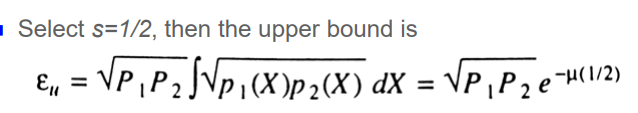

# Bhattacharyya bound(P1-P2)

In [12]:
import math
ex1=np.dot(np.dot((m2-m1).T,np.linalg.inv((c1+c2)/2)),(m2-m1))/8+(np.log(np.linalg.det((c1+c2)/2))-np.log(np.sqrt(np.dot(np.linalg.det(c1),np.linalg.det(c2)))))/2
B12=np.dot(np.sqrt(np.dot(p1,p2)),math.exp(-ex1))
print(B12)    

0.005009754739649732


# Bhattacharyya bound(P2-P3)

In [13]:
ex2=np.dot(np.dot((m3-m2).T,np.linalg.inv((c2+c3)/2)),(m3-m2))/8+(np.log(np.linalg.det((c2+c3)/2))-np.log(np.sqrt(np.dot(np.linalg.det(c2),np.linalg.det(c3)))))/2
B23=np.dot(np.sqrt(np.dot(p2,p3)),math.exp(-ex2))
print(B23)

0.0011918014824533177


# Bhattacharyya bound(P1-P3)

In [14]:
ex3=np.dot(np.dot((m3-m1).T,np.linalg.inv((c1+c3)/2)),(m3-m1))/8+(np.log(np.linalg.det((c1+c3)/2))-np.log(np.sqrt(np.dot(np.linalg.det(c1),np.linalg.det(c3)))))/2
B13=np.dot(np.sqrt(np.dot(p1,p3)),math.exp(-ex3))
print(B13)

1.6131966812848823e-08
